In [19]:
# Import ggplot
from plotnine import ggplot, aes, geom_histogram, geom_point, position_dodge, facet_wrap

In [1]:
# Import setup
from setup.setup import load_and_clean_cdl_data

In [2]:
# Dictionary of color scales by gamemode 
gamemode_color_scales = {
  "Hardpoint": ["red", "orange", "green", "blue", "purple"],
  "Search & Destroy": ["red", "orange", "green", "blue", "purple"],
  "Control": ["red", "green", "blue"]
}

In [7]:
# Dictionary of colors by map & mode 
map_and_mode_colors = {
  "Hardpoint" : {
    "Invasion" : "red", 
    "Karachi" : "orange",
    "Rio" : "green",
    "Skidrow" : "blue",
    "Sub Base" : "purple"
  } ,
  "Search & Destroy" : {
    "Highrise" : "red", 
    "Invasion" : "orange",
    "Karachi" : "green", 
    "Rio" : "blue",
    "Terminal" : "purple"
  },
  "Control" : {
    "Highrise" : "red", 
    "Invasion" : "green", 
    "Karachi" : "blue"
  }
}

In [5]:
# Load in data
cdlDF = load_and_clean_cdl_data()
cdlDF

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\2024.04.10 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v02\setup\setup.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cdlDF = sqlio.read_sql_query("SELECT * FROM cdl_data", conn)


,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,map_result,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,53374,2024-03-24,Sunday,Simp,Atlanta FaZe,5,Rio,Search & Destroy,9,5,...,1,1,W,ATL,FaZe,OpTic Texas,TX,4,10,2
3756,53374,2024-03-24,Sunday,Dashy,OpTic Texas,5,Rio,Search & Destroy,5,7,...,0,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2
3757,53374,2024-03-24,Sunday,Kenny,OpTic Texas,5,Rio,Search & Destroy,4,9,...,0,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2
3758,53374,2024-03-24,Sunday,Pred,OpTic Texas,5,Rio,Search & Destroy,5,8,...,0,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2


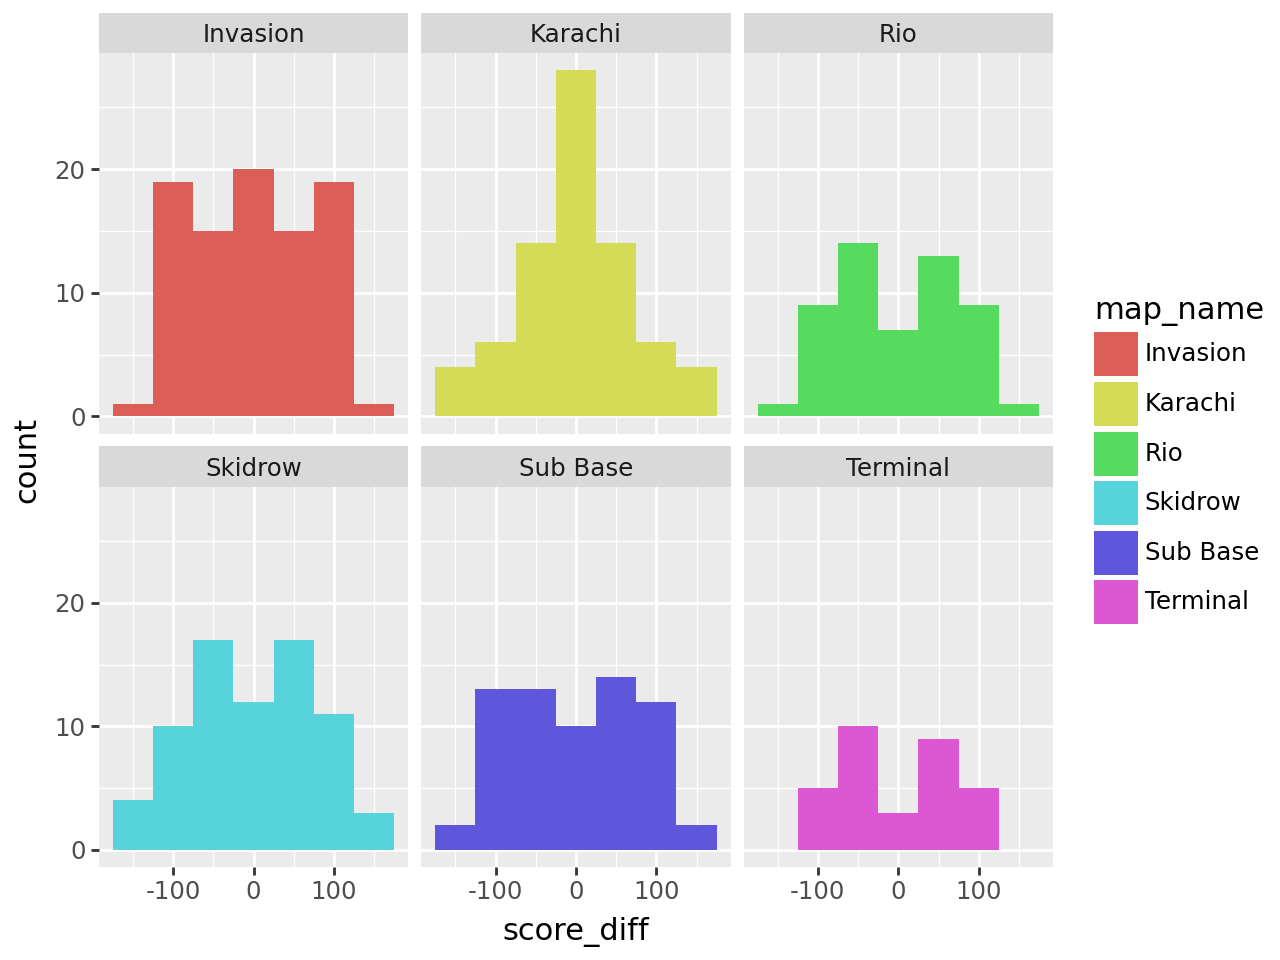

In [20]:
# Score Differentials by Map & Mode
ggplot(cdlDF[cdlDF['gamemode'] == 'Hardpoint'][['match_id', 'map_name', 'score_diff']].drop_duplicates(),
       aes(x = 'score_diff', fill = 'map_name')) + \
       geom_histogram(binwidth = 50, position = position_dodge()) + \
       facet_wrap('~map_name')